<a href="https://colab.research.google.com/github/JonathaSF/PythonFundamentos/blob/master/drop_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep Feed forward para identificação de dígitos... parte 1 :importando e analisando o Dataset

In [25]:
import tensorflow as tf


In [26]:
print(tf.__version__)

2.2.0


In [27]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Vamos ver analisar a primeira imagem

In [28]:
print(x_train.shape)#imagem 28x28

(60000, 28, 28)


In [29]:
print(x_train[0].max(),x_train[0].min())# a imagem tem um só canal entre 0 e 255

255 0


In [30]:
print(len(x_train),len(x_test))

60000 10000


Apresente a quantidade de amostras de cada classe..há balanceamento?

In [31]:
yl=list(y_train)
count=[yl.count(i) for i in range(10)]
count

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

In [32]:
yt=list(y_test)
count=[yt.count(i) for i in range(10)]
count

[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]

In [33]:
import matplotlib.pyplot as plt


3

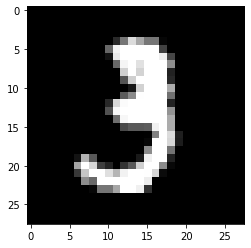

In [34]:
plt.gray()
plt.imshow(x_train[10]) 
y_train[10]

Parte 2 :
a)Transformando os targets (y_train, y_test) em amostras com 10 posições, via one_hot_encoding.

b)Transformando as imagens em um array unidimensional
Com 28x28 elementos. x_train=>x_train1


In [35]:
y_train1=y_train.copy()
y_train1=y_train1.reshape((-1,1))#transformando em uma matrix com uma coluna 

In [36]:
y_train1

array([[5],
       [0],
       [4],
       ...,
       [5],
       [6],
       [8]], dtype=uint8)

Transformação da imagem 2D em vetor 1D

In [37]:
import numpy as np
l_train1=[]
l_test1=[]
for i in range(len(x_train)):
  l_train1.append(x_train[i].reshape((784,)))
for i in range(len(x_test)):
  l_test1.append(x_test[i].reshape((784,)))
x_train1=np.array(l_train1)
x_test1=np.array(l_test1)
x_train[:4],x_test[:4]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
 

In [38]:
x_train1[0].shape

(784,)

In [39]:
# Porque fazer OneHotEnconder?

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y_train1=y_train.copy()
y_train1=y_train1.reshape((-1,1))#transformando em mx1
enc.fit(y_train1)
ytr1=enc.transform(y_train1).toarray()
ytr1[:10]#Observe o encoding da amostra de classe 5 (primeira linha)

y_test1=y_test.copy()
y_test1=y_test.reshape((-1,1))#transformando em mx1
enc.fit(y_test1)
yts1=enc.transform(y_test1).toarray()
yts1[:10]#Observe o encoding da amostra de classe 5 (primeira linha)


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

Parte 3:

a)Criando e treinando modelo

b)Validando o modelo

3)Observando a convergência



In [70]:
tf.random.set_seed(51)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(3000, activation='relu',input_shape=(784,),kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(500, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(100, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [71]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 3000)              2355000   
_________________________________________________________________
dropout (Dropout)            (None, 3000)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 500)               1500500   
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)               50100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)               

In [72]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist=model.fit(x=x_train1,y=ytr1, validation_data=(x_test1, yts1),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 23.9607 - accuracy: 0.6728 - val_loss: 1.5929 - val_accuracy: 0.8917
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.2853 - accuracy: 0.8427 - val_loss: 0.9553 - val_accuracy: 0.8832
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.1536 - accuracy: 0.8378 - val_loss: 1.1431 - val_accuracy: 0.9058
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.3436 - accuracy: 0.8340 - val_loss: 1.2039 - val_accuracy: 0.8975
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.3488 - accuracy: 0.8379 - val_loss: 1.1402 - val_accuracy: 0.8996
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.3113 - accuracy: 0.8356 - val_loss: 1.0333 - val_accuracy: 0.8990
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.2021 - accuracy: 0.8381 - val_loss: 1.0251 - val_accuracy

2

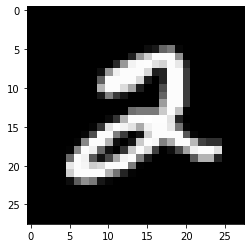

In [62]:
plt.gray()
plt.imshow(x_train[5]) 
y_train[5]

In [73]:
model.predict(x_train1[5].reshape(1,-1))

array([[0.00971308, 0.02309799, 0.43885008, 0.09638609, 0.00294425,
        0.00415424, 0.00098779, 0.36444336, 0.03449916, 0.02492385]],
      dtype=float32)

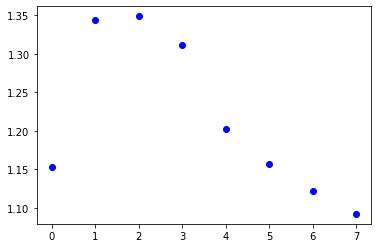

In [75]:
plt.plot(hist.history['loss'][2:], 'bo')
plt.show()